# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_noing_250_512_040dr_2.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_noing_250_512_040dr_2.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(250 -> 512)
  (3): nn.Dropout(0.400000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 4.9067959644881)
('Valid Perplexity: ', 1231.5531880044)
('Test Perplexity: ', 2230.0855503029)


### Loss vs. Epoch

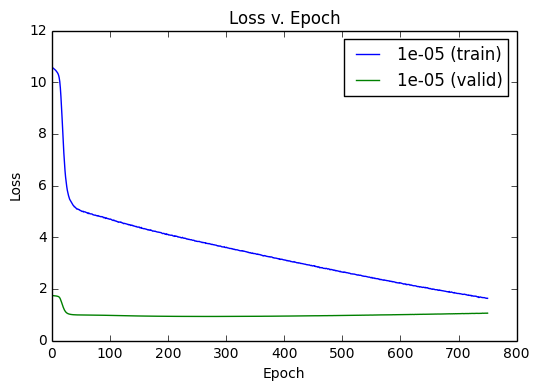

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

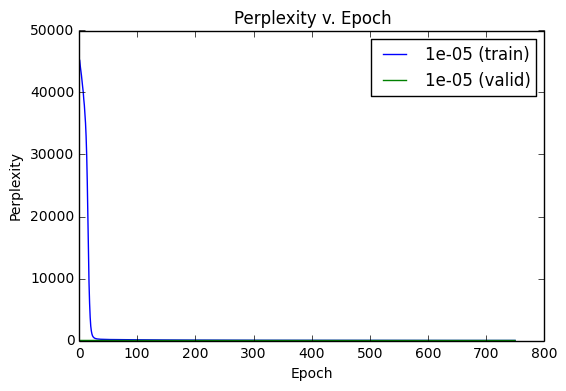

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  fennel - and coriander - spiced salmon fillets

Gend:  <beg> 1 . preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium heat . <step> add the onion

True:  1 to make the marinade , mix together the garlic , red miso , mirin , sake , tobanjan , and sugar in a bowl



Input:  chocolate - mousse - filled strawberries

Gend:  <beg> preheat oven to 350 degrees . <step> cut the first and remove in a large skillet over medium heat . add the onion , and cook and

True:  dice up leftover chicken and remove any bone . add to pot and add water , chicken stock / gravy , garlic , onions <end>



Input:  cheese crusted apple pie

Gend:  <beg> preheat oven to 350 degrees . <step> cut the first and place in a large bowl , and cook . <step> in a large bowl , combine

True:  preheat broiler . <step> sprinkle the salmon steaks generously with salt and pepper . <step> sprinkle with 1 tablespoon lemon <end>



Input:  masaledar salmon - indian spiced baked salmon

G

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  <UNK2> <mask> <UNK2> <mask> <UNK2> <mask> <mask> <mask> <beg> <mask>

Gend:  <beg> preheat oven to 350 degrees . <step> cut the first and remove into . <step> in a large skillet over medium heat . add the onion and

True:  beat eggs and water together in a bowl . <step> add salt ( i do n't use salt due to the <end>



Input:  <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask>

Gend:  <beg> preheat oven to 350 degrees . <step> cut the first and remove into . <step> in a large skillet over medium heat . add the onion and

True:  in a food processor , pulse 1 bun until fine crumbs form ( you should have about 1 / 4 cup ) <end>



Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> preheat oven to 350 degrees . <step> cut the first and remove into . <step> in a large skillet over medium heat . add the onion and

True:  prepare barbecue ( high heat ) . coarsely grind fennel seeds and coriander seeds in spice grinder . brush 

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  pacific rim glazed flank steak

Gend:  <beg> in a large bowl , combine the , sugar , and salt , and salt . <step> in a large skillet over medium - high heat ,

True:  place chocolate in a heatproof bowl and melt over a pot of simmering water . remove from heat and set aside . bring cream to



Input:  chocolate french silk pancakes

Gend:  <beg> preheat oven to 350 degrees . <step> cut the first and place in a large skillet over medium - high heat . add the to and cook

True:  in a bowl , combine the first eight ingredients . <step> combine the cheeses and stir half into <end>



Input:  coffee cake in a mug with cinnamon oatmeal struesel topping

Gend:  <beg> 1 . preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium heat . <step> add the onion

True:  <step> 1 melt butter in a large skillet ( cast iron works well for this purpose <end>



Input:  smoked mackerel kedgeree

Gend:  <beg> in a large bowl , combine the , flour , sugar , and salt , 

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  4.06 

1-gram Score:  20.6
2-gram Score:  6.2
3-gram Score:  1.9
4-gram Score:  1.1


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [10]:
npairs_generated = report['n_pairs_bleu_generated']
npairs_gold = report['n_pairs_bleu_gold']
print 'Overall Score (Generated): ', npairs_generated['score'], '\n'
print '1-gram Score: ', npairs_generated['components']['1']
print '2-gram Score: ', npairs_generated['components']['2']
print '3-gram Score: ', npairs_generated['components']['3']
print '4-gram Score: ', npairs_generated['components']['4']

print '\n'

print 'Overall Score: (Gold)', npairs_gold['score'], '\n'
print '1-gram Score: ', npairs_gold['components']['1']
print '2-gram Score: ', npairs_gold['components']['2']
print '3-gram Score: ', npairs_gold['components']['3']
print '4-gram Score: ', npairs_gold['components']['4']

Overall Score (Generated):  53.5 

1-gram Score:  68.4
2-gram Score:  55.4
3-gram Score:  49
4-gram Score:  44.1


Overall Score: (Gold) 10.37 

1-gram Score:  23.9
2-gram Score:  11.1
3-gram Score:  7.7
4-gram Score:  5.7


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [11]:
print 'Average Generated Score: ', report['average_alignment_generated']
print 'Average Gold Score: ', report['average_alignment_gold']

Average Generated Score:  71.0130718954
Average Gold Score:  22.477124183
